
<h1 align="center"> Statistics and Financial Data Analysis
<h1 align="center"> Examples


In [1]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import scipy as sp
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
np.random.seed(17)

mu = 0
std = 0.4

a = 2
b = 0.5

# Create random variable from distribution used
rv = stats.norm(mu,std)
n = 200
    
def f(x,a,b,rv):
    n = x.size
    y = np.zeros(n)
    y_data = np.zeros(n)
    y_1 = np.zeros(n)
    y_2 = np.zeros(n)
    z = rv.rvs(size = n) #generate n random variables
    for i in range(n):
        y_data[i] = a*x[i]+b + z[i]
        y[i] = a*x[i]+b 
        y_1[i] = a*1.2*x[i]-1.2 
        y_2[i] = a*0.9*x[i]+1.1 
    return y_data,y,y_1,y_2

In [3]:
x = np.linspace(0,10, n)
yd,y,y_1,y_2 = f(x,a,b,rv)

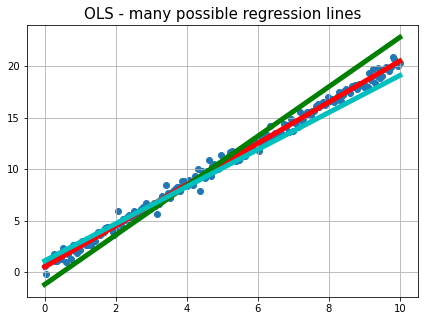

In [4]:
plt.figure(1, figsize=(7,5)) 
plt.scatter(x,yd)
plt.plot(x,y,'r',linewidth= 5)
plt.plot(x,y_1,'g',linewidth= 5)
plt.plot(x,y_2,'c',linewidth= 5)
plt.title('OLS - many possible regression lines', fontsize = 15)
plt.grid()
#plt.savefig("OLS_Example1")

In [5]:
import statsmodels.api as sm

X = x
y = yd
Xnew = sm.add_constant(X) # Xnew.shape = (201,2)
#in each row, Xnew[i]=(1,X(i))
#recall y_hat[i] = beta_0 * 1 + beta_1 * x[i]
model = sm.OLS(y, Xnew).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.840e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          1.12e-228
Time:                        22:12:06   Log-Likelihood:                -108.19
No. Observations:                 200   AIC:                             220.4
Df Residuals:                     198   BIC:                             227.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5486      0.059      9.323      0.000       0.433       0.665
x1             1.9951      0.010    195.968      0.000       1.975       2.015
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.694
Skew:                           0.023   Prob(JB):                        0.158
Kurtosis:                       3.664   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

df_residuals: n - (m+1) = 201 - 2 = 199  
$stderror^{2}_{\beta_1}$ = $\sqrt{\frac{\hat{\sigma}^2}{n(S_x^2)}}$   

$std error^2_{\beta_0} = \hat{\sigma}^2 (\frac{1}{n}+\frac{\bar{x}^2}{n(S_x^2)})$

$\hat{\sigma}^2 =\frac{\sum_{i=1}^{201}\hat{\epsilon}^2_i}{n-2}$ , while $\hat{\epsilon} = y_i - \hat{y}_i$  

$S_x^2 = \frac{\sum_{i=1}^{201}(x_i-\hat{x}_i)^2}{n}$

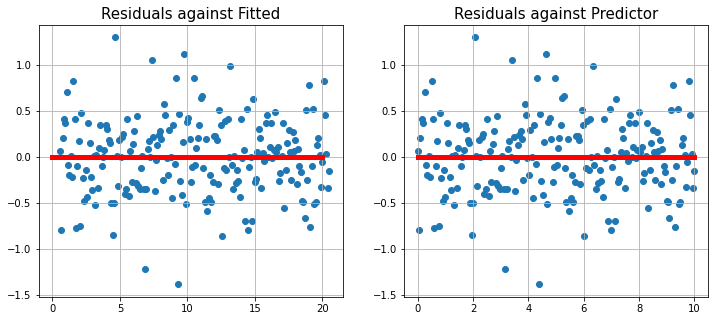

In [6]:
y_fitted = model.predict(Xnew) # make the predictions by the model
res = model.resid

plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(y_fitted,res)
plt.plot(a*x,np.zeros(n),'r',linewidth = 5)
plt.title('Residuals against Fitted', fontsize = 15)
plt.grid()
plt.subplot(1,2, 2)
plt.scatter(x,res)
plt.plot(x,np.zeros(n),'r',linewidth = 5)
plt.title('Residuals against Predictor', fontsize = 15)
plt.grid()
#plt.savefig("Resid_NoCorrelation")

In [7]:
print("Sum of all residuals = ", res.sum())
print("Cov of residual with predictor = ", np.cov(x,res)[0,1])
print("Cov of residual with fitted values = ", np.cov(y_fitted,res)[0,1])

Sum of all residuals =  -2.631228568361621e-13
Cov of residual with predictor =  1.0232454273364728e-14
Cov of residual with fitted values =  2.0396129230466818e-14


In [8]:
np.random.seed(17)

In [9]:
x = x
y = yd
m = 1000

param0 = np.zeros(m)
param1 = np.zeros(m)

# Create random variable from distribution used
mu = 0
std = 0.5
rv = stats.norm(mu,std)
z = np.zeros(n)

a = 2
b = 0.5
X = sm.add_constant(x)

for i in range(m):
    z = rv.rvs(size = n)
    yd = np.zeros(n)
    for j in range(n):
        yd[j] = a*x[j] + b + z[j]
    model = sm.OLS(yd, X).fit()
    param0[i] = model.params[0]
    param1[i] = model.params[1]

print("Expected estimates of coefficient beta 0: ", param0.mean())
print("Actual coefficient beta 0: ", b)
print("Expected estimates of coefficient beta 1: ", param1.mean())
print("Actual coefficient beta 1: ", a)

Expected estimates of coefficient beta 0:  0.4993591488939806
Actual coefficient beta 0:  0.5
Expected estimates of coefficient beta 1:  2.00023000930736
Actual coefficient beta 1:  2


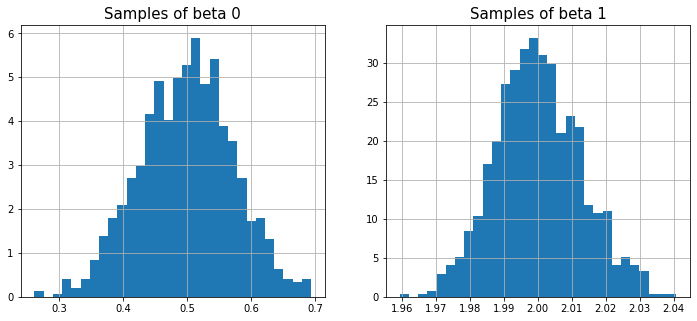

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.hist(param0, bins = 30, density = True)
plt.title('Samples of beta 0', fontsize = 15)
plt.grid()
plt.subplot(1,2, 2)
plt.hist(param1, bins = 30, density = True)
plt.title('Samples of beta 1' , fontsize = 15)
plt.grid()
#plt.savefig("Sampled coefficients of OLS Regression")

In [11]:
df = pd.read_csv('WeekInt.csv')

In [12]:
df.head()

,mo,nth,day y,ear ff,tb03,cm10,cm30,discount,prime,aaa,xxx
0,2,16,77,4.70,4.62,7.36,7.69,5.25,6.25,8.04,105.30
1,2,23,77,4.74,4.67,7.39,7.75,5.25,6.25,8.08,105.24
2,3,2,77,4.68,4.70,7.47,7.81,5.25,6.25,8.10,105.30
3,3,9,77,4.63,4.64,7.49,7.82,5.25,6.25,8.12,105.26
4,3,16,77,4.62,4.59,7.45,7.80,5.25,6.25,8.09,105.40


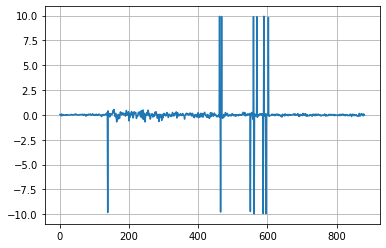

In [13]:
df['aaa_diff']= df['aaa'].diff().dropna() #diff(): work out the difference
#between the row and the row above it
df['cm10_diff']= df['cm10'].diff().dropna()
plt.plot(df['aaa_diff'])
plt.grid()

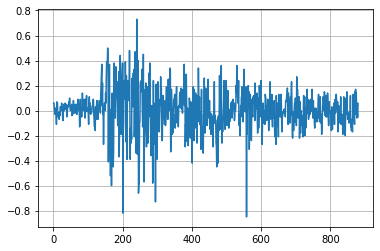

In [14]:
df['cm30_diff']= df['cm30'].diff().dropna()
plt.plot(df['cm30_diff'])
plt.grid()

In [15]:
# Filter data:
q_low = df['aaa_diff'].quantile(0.01)
q_high = df['aaa_diff'].quantile(0.99)
q_low

-0.6362999999999999

In [16]:
df_filtered = df[(df['aaa_diff'] < q_high ) & (df['aaa_diff'] > q_low)]

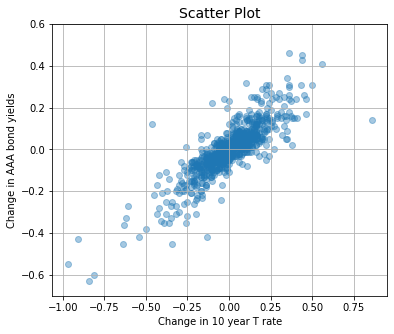

In [17]:
plt.figure(figsize=(6,5))
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.title('Scatter Plot', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.ylim(-0.7,0.6)
plt.grid()
#plt.savefig("Scatter")

In [18]:
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
Xnew = sm.add_constant(X)
model_1 = sm.OLS(y, Xnew).fit()
y_fitted = model_1.predict(Xnew)

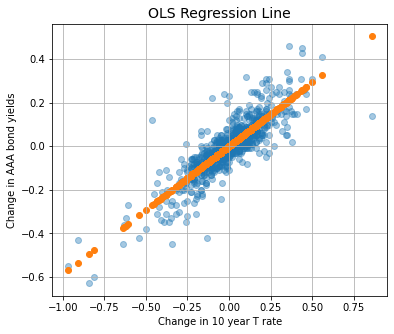

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.scatter(X,y_fitted)
plt.title('OLS Regression Line', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.grid()
#plt.savefig("AAA_10Y")

In [20]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2221.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          1.57e-240
Time:                        22:12:25   Log-Likelihood:                 1149.6
No. Observations:                 862   AIC:                            -2295.
Df Residuals:                     860   BIC:                            -2286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.785e-06      0.002      0.004      0.996      -0.004       0.004
cm10_diff      0.5871      0.012     47.129      0.000       0.563       0.612
==============================================================================
Omnibus:                      111.997   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1063.520
Skew:                           0.143   Prob(JB):                    1.15e-231
Kurtosis:                       8.434   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
np.random.seed(17)

mu = 0
std = 2

a = 2
b = 0.5

# Create random variable from distribution used
rv = stats.norm(mu,std)
n = 1000
    
def f_X_2(x,a,b,rv):
    n = x.size
    y = np.zeros(n)
    y_data = np.zeros(n)
    y_1 = np.zeros(n)
    y_2 = np.zeros(n)
    z = rv.rvs(size = n)
    for i in range(n):
        y_data[i] = a*x[i]*x[i] + z[i]
        y[i] = a*x[i]*x[i]
    return y_data,y

In [22]:
np.random.seed(17)

mu = 0
std = 2

a = 2
b = 0.5

# Create random variable from distribution used
rv = stats.norm(mu,std)
n = 1000
    
def f_X_3(x,a,b,rv):
    n = x.size
    y = np.zeros(n)
    y_data = np.zeros(n)
    y_1 = np.zeros(n)
    y_2 = np.zeros(n)
    z = rv.rvs(size = n)
    for i in range(n):
        y_data[i] = a*x[i]*x[i]*x[i] + 5*z[i] + 10*b
        y[i] = a*x[i]*x[i] + 10*b
      
    return y_data,y

In [23]:
x = np.linspace(-5,5, n)
yd,y = f_X_2(x,a,b,rv)
yd2,y2 = f_X_3(x,a,b,rv)


In [24]:
X = x
y = yd
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_fitted = model.predict(X)
np.sqrt(np.cov(y_fitted,y))

array([[1.40438670e-02, 1.40438670e-02],
       [1.40438670e-02, 1.51021608e+01]])

In [25]:
X = x
y2 = yd2
X = sm.add_constant(X)
model2 = sm.OLS(y2, X).fit()
y_fitted2 = model2.predict(X)
np.sqrt(np.cov(y_fitted2,y2))

array([[87.20459515, 87.20459515],
       [87.20459515, 95.63223405]])

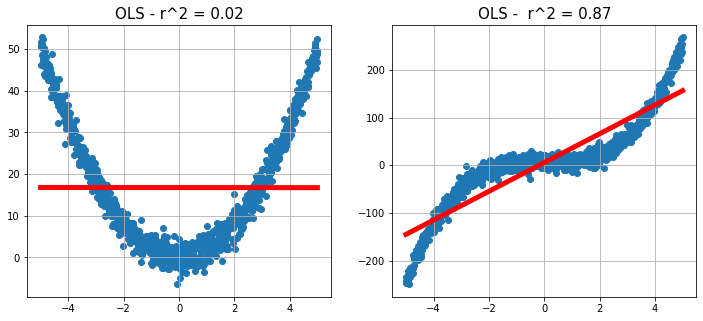

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(x,yd)
plt.plot(x,y_fitted,'r',linewidth= 5)
plt.title('OLS - r^2 = 0.02', fontsize = 15)
plt.grid()
plt.subplot(1,2, 2)
plt.scatter(x,yd2)
plt.plot(x,y_fitted2,'r',linewidth= 5)
plt.title('OLS -  r^2 = 0.87', fontsize = 15)
plt.grid()
#plt.savefig("Differetn r^2 and p-values")

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0008630
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.977
Time:                        22:12:34   Log-Likelihood:                -4133.3
No. Observations:                1000   AIC:                             8271.
Df Residuals:                     998   BIC:                             8280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7429      0.478     35.041      0.000      15.805      17.681
x1            -0.0049      0.165     -0.029      0.977      -0.329       0.320
==============================================================================
Omnibus:                      148.286   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.072
Skew:                           0.633   Prob(JB):                     2.27e-21
Kurtosis:                       2.176   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     4925.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:12:35   Log-Likelihood:                -5088.5
No. Observations:                1000   AIC:                         1.018e+04
Df Residuals:                     998   BIC:                         1.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6659      1.242      4.562      0.000       3.229       8.103
x1            30.1633      0.430     70.181      0.000      29.320      31.007
==============================================================================
Omnibus:                       22.523   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.086
Skew:                          -0.001   Prob(JB):                      0.00237
Kurtosis:                       2.461   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df['ff_diff']= df['ear ff'].diff().dropna()
df['cm30_diff']= df['cm30'].diff().dropna()


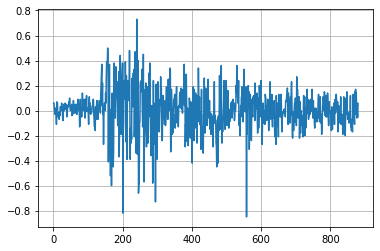

In [30]:
plt.plot(df['cm30_diff'])
plt.grid()

In [31]:
# Filter data:
q_low = df['aaa_diff'].quantile(0.01)
q_high = df['aaa_diff'].quantile(0.95)
q_low

-0.6362999999999999

In [32]:
df_filtered = df[(df['aaa_diff'] < q_high ) & (df['aaa_diff'] > q_low)]

In [33]:
df_filtered.head()

,mo,nth,day y,ear ff,tb03,cm10,cm30,discount,prime,aaa,xxx,aaa_diff,cm10_diff,cm30_diff,ff_diff
1,2,23,77,4.74,4.67,7.39,7.75,5.25,6.25,8.08,105.24,0.04,0.03,0.06,0.04
2,3,2,77,4.68,4.70,7.47,7.81,5.25,6.25,8.10,105.30,0.02,0.08,0.06,-0.06
3,3,9,77,4.63,4.64,7.49,7.82,5.25,6.25,8.12,105.26,0.02,0.02,0.01,-0.05
4,3,16,77,4.62,4.59,7.45,7.80,5.25,6.25,8.09,105.40,-0.03,-0.04,-0.02,-0.01
5,3,23,77,4.77,4.57,7.44,7.77,5.25,6.25,8.00,105.14,-0.09,-0.01,-0.03,0.15


In [34]:
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
Xnew = sm.add_constant(X)
model = sm.OLS(y, Xnew).fit()
y_fitted = model.predict(Xnew)

In [38]:
names = ['aaa_diff','cm10_diff','cm30_diff','ff_diff']
fullList = [df_filtered['aaa_diff'],df_filtered['cm10_diff'],df_filtered['cm30_diff'],df_filtered['ff_diff']]
myDict = dict(zip(names,fullList)) #key: names, value @fulllist
df_new = pd.DataFrame({key:pd.Series(value) for key,value in myDict.items()})
df_new.head()

,aaa_diff,cm10_diff,cm30_diff,ff_diff
1,0.04,0.03,0.06,0.04
2,0.02,0.08,0.06,-0.06
3,0.02,0.02,0.01,-0.05
4,-0.03,-0.04,-0.02,-0.01
5,-0.09,-0.01,-0.03,0.15


In [36]:
myDict

{'aaa_diff': 1      0.04
 2      0.02
 3      0.02
 4     -0.03
 5     -0.09
        ... 
 876   -0.04
 877   -0.09
 878    0.11
 879   -0.02
 880   -0.01
 Name: aaa_diff, Length: 827, dtype: float64,
 'cm10_diff': 1      0.03
 2      0.08
 3      0.02
 4     -0.04
 5     -0.01
        ... 
 876   -0.02
 877   -0.05
 878    0.02
 879    0.04
 880   -0.08
 Name: cm10_diff, Length: 827, dtype: float64,
 'cm30_diff': 1      0.06
 2      0.06
 3      0.01
 4     -0.02
 5     -0.03
        ... 
 876   -0.04
 877   -0.06
 878    0.02
 879    0.06
 880   -0.05
 Name: cm30_diff, Length: 827, dtype: float64,
 'ff_diff': 1      0.04
 2     -0.06
 3     -0.05
 4     -0.01
 5      0.15
        ... 
 876    0.11
 877   -0.17
 878    0.02
 879    0.05
 880    0.00
 Name: ff_diff, Length: 827, dtype: float64}

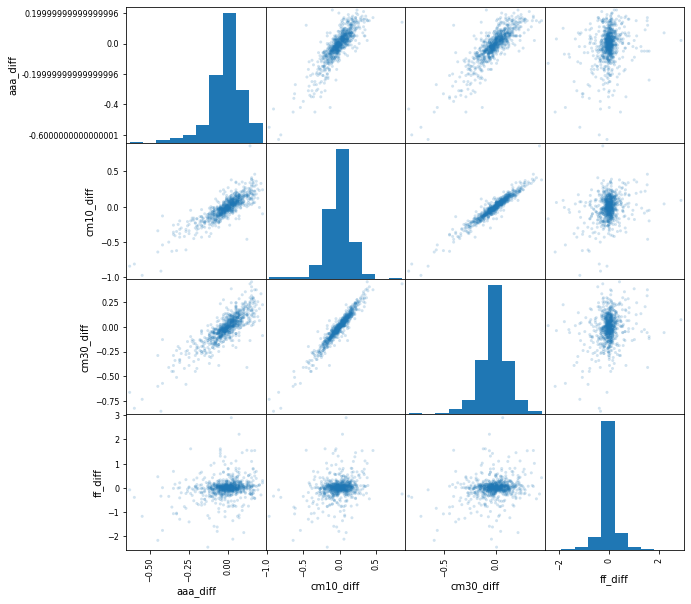

In [40]:
pd.plotting.scatter_matrix(df_new, alpha = 0.2, figsize= (10,10));
#add a semi-colon is the same as plt.show()

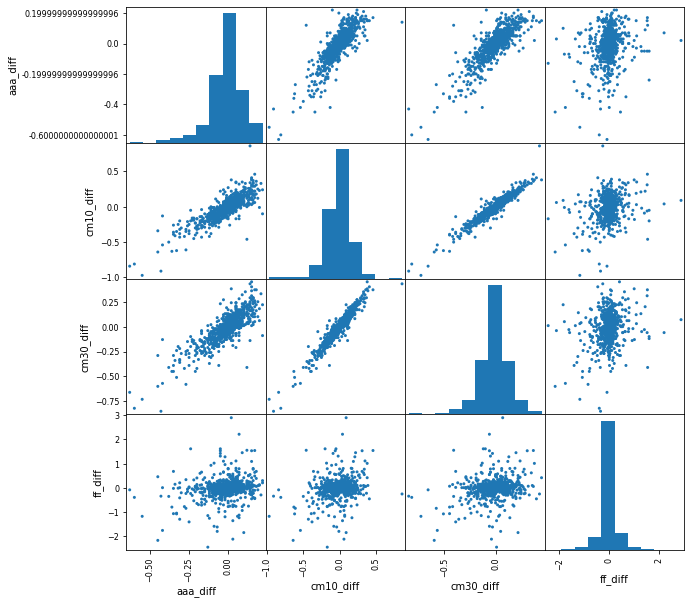

In [45]:
pd.plotting.scatter_matrix(df_new, alpha =1,figsize=(10,10))
plt.show()

In [274]:
names = ['cm10_diff','cm30_diff','ff_diff']
fullList = [df_filtered['cm10_diff'],df_filtered['cm30_diff'],df_filtered['ff_diff']]
myDict = dict(zip(names, fullList))
df_pred = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_pred.head()

,cm10_diff,cm30_diff,ff_diff
1,0.03,0.06,0.04
2,0.08,0.06,-0.06
3,0.02,0.01,-0.05
4,-0.04,-0.02,-0.01
5,-0.01,-0.03,0.15


In [275]:
y = df_new['aaa_diff']
Xnew = df_pred

#np.column_stack((df_new['cm10_diff'],df_new['cm30_diff'],df_new['ff_diff']))

Xnew = sm.add_constant(Xnew)
model_3 = sm.OLS(y, Xnew).fit()
y_fitted = model_3.predict(Xnew)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     695.8
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          3.59e-225
Time:                        07:12:46   Log-Likelihood:                 1199.1
No. Observations:                 827   AIC:                            -2390.
Df Residuals:                     823   BIC:                            -2371.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.002     -2.602      0.009      -0.009      -0.001
cm10_diff      0.3122      0.042      7.406      0.000       0.229       0.395
cm30_diff      0.2648      0.047      5.651      0.000       0.173       0.357
ff_diff        0.0061      0.005      1.225      0.221      -0.004       0.016
==============================================================================
Omnibus:                      118.404   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.624
Skew:                          -0.289   Prob(JB):                    1.10e-236
Kurtosis:                       8.586   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
df_new.corr() #directly calculate the correlation

,aaa_diff,cm10_diff,cm30_diff,ff_diff
aaa_diff,1.000000,0.840216,0.834716,0.231196
cm10_diff,0.840216,1.000000,0.958119,0.255507
cm30_diff,0.834716,0.958119,1.000000,0.229857
ff_diff,0.231196,0.255507,0.229857,1.000000


In [277]:
y = df_new['aaa_diff']
Xnew = df_new['ff_diff']

Xnew = sm.add_constant(Xnew)
model = sm.OLS(y, Xnew).fit()
y_fitted = model.predict(Xnew)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     46.59
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.70e-11
Time:                        07:12:46   Log-Likelihood:                 699.55
No. Observations:                 827   AIC:                            -1395.
Df Residuals:                     825   BIC:                            -1386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.004     -3.432      0.001      -0.020      -0.005
ff_diff        0.0598      0.009      6.826      0.000       0.043       0.077
==============================================================================
Omnibus:                      226.992   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.669
Skew:                          -1.276   Prob(JB):                    2.06e-177
Kurtosis:                       7.136   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
names = ['cm10_diff','cm30_diff']
fullList = [df_filtered['cm10_diff'],df_filtered['cm30_diff']]
myDict = dict(zip(names, fullList))
df_pred2 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_pred2.head()

,cm10_diff,cm30_diff
1,0.03,0.06
2,0.08,0.06
3,0.02,0.01
4,-0.04,-0.02
5,-0.01,-0.03


In [279]:
y = df_new['aaa_diff']
Xnew = df_new['cm30_diff']

Xnew = sm.add_constant(Xnew)
model_cm30 = sm.OLS(y, Xnew).fit()
y_fitted = model_cm30.predict(Xnew)
model_cm30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1896.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          5.81e-216
Time:                        07:12:46   Log-Likelihood:                 1170.2
No. Observations:                 827   AIC:                            -2336.
Df Residuals:                     825   BIC:                            -2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.002     -2.479      0.013      -0.009      -0.001
cm30_diff      0.6034      0.014     43.538      0.000       0.576       0.631
==============================================================================
Omnibus:                      100.529   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.802
Skew:                          -0.114   Prob(JB):                    3.62e-189
Kurtosis:                       8.013   Cond. No.                         6.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
y = df_new['aaa_diff']
Xnew = df_new['cm10_diff']

Xnew = sm.add_constant(Xnew)
model_cm10 = sm.OLS(y, Xnew).fit()
y_fitted = model_cm10.predict(Xnew)
model_cm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1981.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          1.72e-221
Time:                        07:12:46   Log-Likelihood:                 1183.0
No. Observations:                 827   AIC:                            -2362.
Df Residuals:                     825   BIC:                            -2353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.002     -2.735      0.006      -0.010      -0.002
cm10_diff      0.5429      0.012     44.506      0.000       0.519       0.567
==============================================================================
Omnibus:                      134.666   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.841
Skew:                          -0.393   Prob(JB):                    8.32e-286
Kurtosis:                       9.122   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
y = df_new['aaa_diff']
Xnew = df_pred2

Xnew = sm.add_constant(Xnew)
model_2 = sm.OLS(y, Xnew).fit()
y_fitted = model_2.predict(Xnew)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aaa_diff   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1042.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          2.08e-226
Time:                        07:12:46   Log-Likelihood:                 1198.4
No. Observations:                 827   AIC:                            -2391.
Df Residuals:                     824   BIC:                            -2377.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.002     -2.609      0.009      -0.009      -0.001
cm10_diff      0.3188      0.042      7.620      0.000       0.237       0.401
cm30_diff      0.2617      0.047      5.591      0.000       0.170       0.354
==============================================================================
Omnibus:                      117.198   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.154
Skew:                          -0.235   Prob(JB):                    2.39e-251
Kurtosis:                       8.768   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_1,model_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,825.0,2.770512,0.0,NaN,NaN,NaN
1,823.0,2.664379,2.0,0.106133,16.391703,1.045451e-07


anova_lm(model_2,model3)

In [283]:
anova_lm(model_2,model_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,824.0,2.669240,0.0,NaN,NaN,NaN
1,823.0,2.664379,1.0,0.004861,1.501478,0.220795


In [284]:
model_2.bse


const        0.001987
cm10_diff    0.041834
cm30_diff    0.046805
dtype: float64

In [285]:
print('cm_10_1pred', round(model_cm10.params[1],4),' std err', round(model_cm10.bse[1],4))
print('cm_10_2pred', round(model_2.params[1],4), ' std err', round(model_2.bse[1],4))
print('')
print('cm_30_1pred', round(model_cm30.params[1],4), ' std err', round(model_cm30.bse[1],4))
print('cm_30_2pred', round(model_2.params[2],4), ' std err', round(model_2.bse[2],4))

cm_10_1pred 0.5429  std err 0.0122
cm_10_2pred 0.3188  std err 0.0418

cm_30_1pred 0.6034  std err 0.0139
cm_30_2pred 0.2617  std err 0.0468


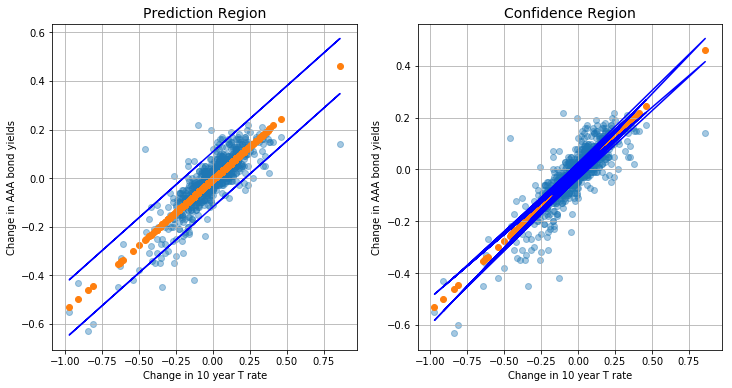

In [286]:
#Prediction interval

X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
Xnew = sm.add_constant(X)
model_1 = sm.OLS(y, Xnew).fit()
y_fitted = model_1.predict(Xnew)

res = model_1.resid

model_pred_y_up = y_fitted + 1.96*np.std(res)
model_pred_y_down = y_fitted - 1.96*np.std(res)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.scatter(X,y_fitted)
plt.plot(X,model_pred_y_up, color = 'blue')
plt.plot(X,model_pred_y_down, color = 'blue')

plt.title('Prediction Region', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.grid()

#Confidence interval
n = len(X)

model_pred_y_up = np.zeros(n)
model_pred_y_down = np.zeros(n)
s_x = X.std()*np.sqrt(n)

for i in range(n):
    model_pred_y_up[i] = y_fitted.iloc[i] + 1.96*np.std(res)*np.sqrt(X.iloc[i]*X.iloc[i]/s_x)
    model_pred_y_down[i] = y_fitted.iloc[i] - 1.96*np.std(res)*np.sqrt(X.iloc[i]*X.iloc[i]/s_x)

plt.subplot(1,2,2)
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.scatter(X,y_fitted)
plt.plot(X,model_pred_y_up, color = 'blue')
plt.plot(X,model_pred_y_down, color = 'blue')

plt.title('Confidence Region', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.grid()

#plt.savefig("Conf_Pred_Regions")

In [347]:
start_date = '2018-01-01'
end_date = '2018-12-31'
GS = pd_data.DataReader('GS','yahoo',start_date,end_date)
SPY = pd_data.DataReader('SPY','yahoo',start_date,end_date)
DIA = pd_data.DataReader('DIA','yahoo',start_date,end_date)
WMT = pd_data.DataReader('WMT','yahoo',start_date,end_date)
EURUSD = pd_data.DataReader('EURUSD=X','yahoo',start_date,end_date)
GBPUSD = pd_data.DataReader('GBPUSD=X','yahoo',start_date,end_date)

In [348]:
GSrtn = np.log(GS['Adj Close']).diff().dropna()
SPYrtn = np.log(SPY['Adj Close']).diff().dropna()
DIArtn = np.log(DIA['Adj Close']).diff().dropna()
WMTrtn = np.log(WMT['Adj Close']).diff().dropna()
EURUSDrtn = np.log(EURUSD['Close']).diff().dropna()
GBPUSDrtn = np.log(GBPUSD['Close']).diff().dropna()

In [349]:
names = ['GS','SPY','DIA','WMT','EURUSD','GBPUSD']
fullList = [GSrtn,SPYrtn,DIArtn,WMTrtn,EURUSDrtn,GBPUSDrtn]
myDict = dict(zip(names, fullList))
df_2 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_equit = df_2.dropna()

In [350]:
names = ['SPY','DIA','WMT','EURUSD','GBPUSD']
fullList = [SPYrtn,DIArtn,WMTrtn,EURUSDrtn,GBPUSDrtn]
myDict = dict(zip(names, fullList))
df_3 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_equit3 = df_3.dropna()

In [351]:
SPYrtn.describe()

count    250.000000
mean      -0.000216
std        0.010771
min       -0.042722
25%       -0.004388
50%        0.000358
75%        0.005427
max        0.049290
Name: Adj Close, dtype: float64

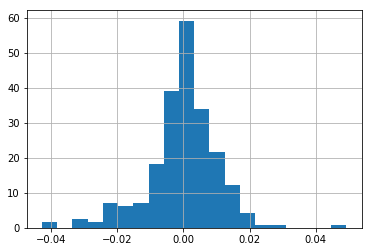

In [352]:
SPYrtn.hist(density = True, bins = 20)

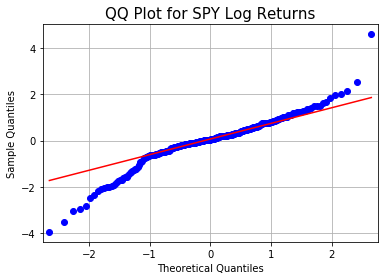

In [354]:
import statsmodels.api as sm
fig = sm.qqplot(SPYrtn, fit = True, line = 'q')
plt.title('QQ Plot for SPY Log Returns', fontsize=15)
plt.grid()
plt.show()

In [294]:
mean_annualised = SPYrtn.mean()*252*100
mean_annualised

-5.432959883356317

In [378]:
SPYrtn.mean()

-0.00021559364616493325

In [376]:
sp.stats.ttest_1samp(SPYrtn, 0 ) # H0 = avg return is equal to zero

Ttest_1sampResult(statistic=-0.31647157854015967, pvalue=0.7519097398431833)

In [382]:
sp.stats.ttest_1samp(SPYrtn, 0.01 ) # H0 = avg return is equal to 10

Ttest_1sampResult(statistic=-14.995548822683658, pvalue=1.1776658838989407e-36)

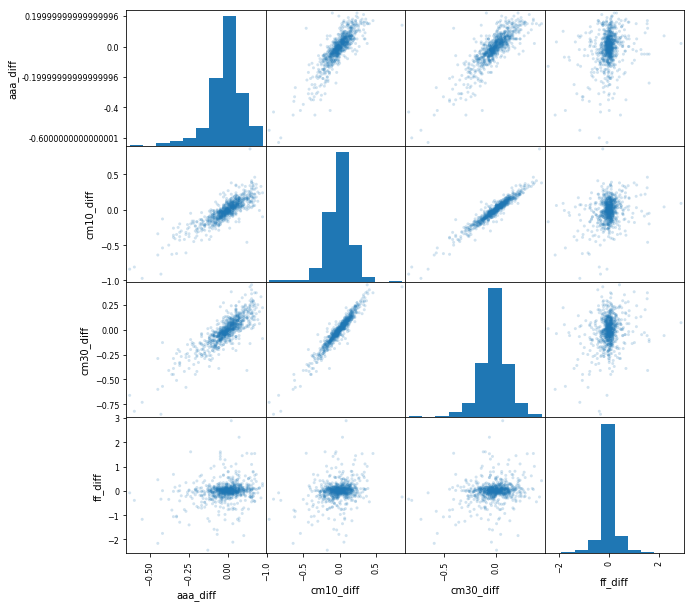

In [297]:
pd.plotting.scatter_matrix(df_new, alpha = 0.2, figsize= (10,10), );

In [298]:
# Regress GSrtn against all other rtn

X = df_equit['SPY']
y = df_equit['GS']

Xnew = sm.add_constant(X)
model1 = sm.OLS(y, Xnew).fit()
y_fitted = model1.predict(Xnew)
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     333.9
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           7.33e-46
Time:                        07:12:55   Log-Likelihood:                 685.80
No. Observations:                 220   AIC:                            -1368.
Df Residuals:                     218   BIC:                            -1361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -1.569      0.118      -0.003       0.000
SPY            1.1918      0.065     18.274      0.000       1.063       1.320
==============================================================================
Omnibus:                       27.318   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.463
Skew:                          -0.468   Prob(JB):                     2.04e-18
Kurtosis:                       5.830   Cond. No.                         89.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# Regress GSrtn against all other rtn

X = df_equit3
y = df_equit['GS']

Xnew = sm.add_constant(X)
model5 = sm.OLS(y, Xnew).fit()
y_fitted = model5.predict(Xnew)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     76.52
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           9.99e-46
Time:                        07:12:55   Log-Likelihood:                 696.40
No. Observations:                 220   AIC:                            -1381.
Df Residuals:                     214   BIC:                            -1360.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -1.521      0.130      -0.002       0.000
SPY            0.1335      0.282      0.473      0.637      -0.423       0.690
DIA            1.1038      0.276      4.001      0.000       0.560       1.648
WMT           -0.1160      0.053     -2.174      0.031      -0.221      -0.011
EURUSD        -0.0152      0.221     -0.069      0.945      -0.450       0.420
GBPUSD         0.3074      0.192      1.598      0.112      -0.072       0.687
==============================================================================
Omnibus:                       22.168   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.322
Skew:                          -0.336   Prob(JB):                     3.97e-15
Kurtosis:                       5.605   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
anova_lm(model1,model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,218.0,0.025253,0.0,NaN,NaN,NaN
1,214.0,0.022934,4.0,0.002318,5.407629,0.000363


In [384]:
y = df_new['aaa_diff']
Xnew = df_pred2

Xnew = sm.add_constant(Xnew)
model_2_x = sm.OLS(y, Xnew).fit()
y_fitted_x = model_2_x.predict(Xnew)

In [385]:
res_2 = model_2_x.resid

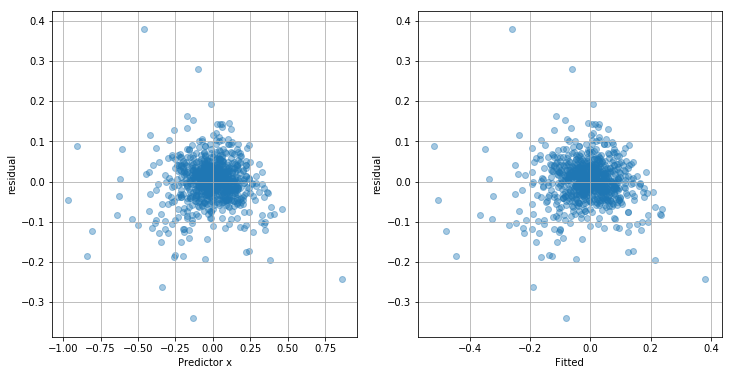

In [388]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df_pred2['cm10_diff'],res_2,marker = 'o', alpha = 0.4)
plt.grid()

plt.xlabel('Predictor cm_10_diff')
plt.ylabel('residual')
plt.subplot(1,2,2)
plt.scatter(y_fitted_x, res_2,marker = 'o', alpha = 0.4)

plt.xlabel('Fitted')
plt.ylabel('residual')
plt.grid()

#plt.savefig("Conf_Pred_Regions")

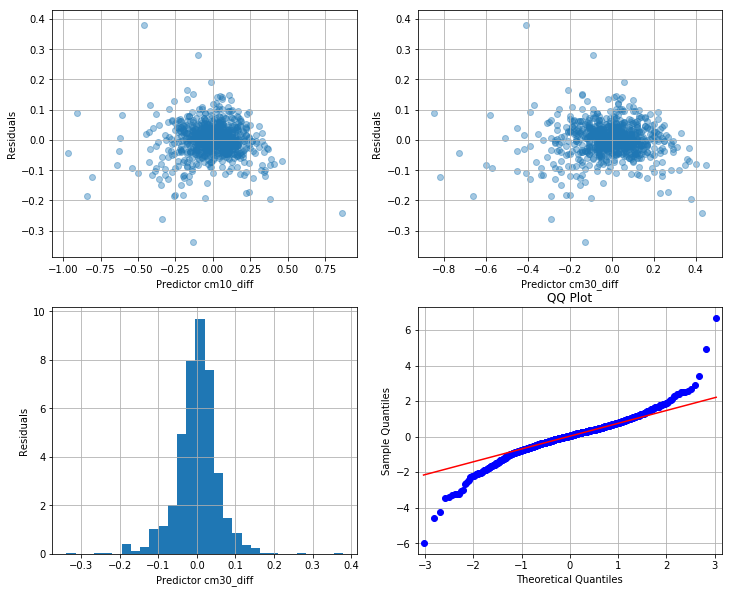

In [390]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax= axes.flatten()

#fig.suptitle("A few diagnostic plots", size = 15)

ax[0].scatter(df_pred2['cm10_diff'], res_2, marker = 'o', alpha = 0.4)
ax[0].grid()
ax[0].set(xlabel = 'Predictor cm10_diff', ylabel = 'Residuals')

ax[1].scatter(df_pred2['cm30_diff'], res_2, marker = 'o', alpha = 0.4)
ax[1].grid()  
ax[1].set(xlabel = 'Predictor cm30_diff', ylabel = 'Residuals')


ax[2].hist(res_2, bins = 30, density = True)
ax[2].grid()
ax[2].set(xlabel = 'Predictor cm30_diff', ylabel = 'Residuals')


sm.qqplot(res_2, fit = True, line='q',ax = ax[3])
ax[3].grid()
ax[3].set_title("QQ Plot")

#plt.savefig("Diagnostics_graphs1")


In [391]:
import statsmodels.stats.outliers_influence as infl
infl = model_2.get_influence()
sm_fr = infl.summary_frame()
sm_tbl = infl.summary_table()

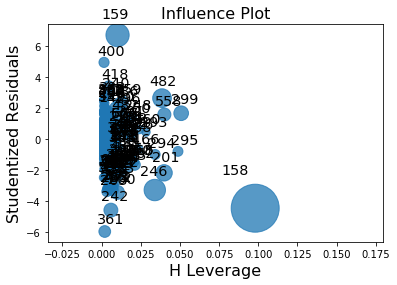

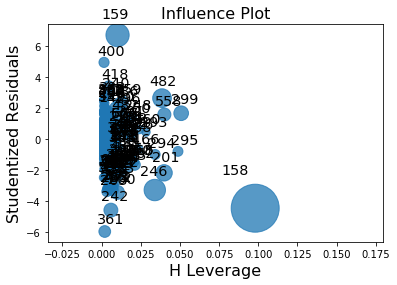

In [392]:
infl.plot_influence()

In [307]:
df = pd.read_csv('nelsonplosser.csv')

In [308]:
df.tail()

,X.Y.m.d,gnp.r,gnp.n,gnp.pc,ip,emp,ur,gnp.p,cpi,wg.n,wg.r,M,vel,bnd,sp
106,19661231,658.1,749857.0,3349.0,98.0,76018.0,3.8,113.9,97.2,6643.0,68.34,308.0,1.76,4.75,85.26
107,19671231,675.2,793927.0,3399.0,100.0,77818.0,3.8,117.6,100.0,6880.0,68.80,331.8,1.72,4.95,91.93
108,19681231,706.6,864202.0,3522.0,105.8,79455.0,3.6,122.3,104.2,7347.0,70.51,361.6,1.72,5.93,98.70
109,19691231,724.7,929095.0,3577.0,110.7,81408.0,3.5,128.2,109.8,7775.0,70.81,385.2,1.73,6.54,97.84
110,19701231,720.0,974126.0,3516.0,106.7,81815.0,4.9,135.3,116.3,8150.0,70.08,401.3,1.73,7.60,83.82


In [309]:
x1 = df['gnp.r'].diff().dropna()
x2 = df['gnp.pc'].diff().dropna()
x3 = np.log(df['ip']).diff().dropna()
x4 = np.log(df['cpi']).diff().dropna()
x5 = df['emp'].diff().dropna()
x6 = df['bnd'].diff().dropna()
y = np.log(df['sp']).diff().dropna()

In [310]:
names = ['log_sp_diff','gnp_r_diff','gnp_pc_diff','log_ip_diff','log_cpi_diff','emp_diff','bnd_diff']
fullList = [y,x1, x2,x3,x4,x5,x6]
myDict = dict(zip(names, fullList))
df_np0 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_np = df_np0.dropna()

In [311]:
df_np.head()

,log_sp_diff,gnp_r_diff,gnp_pc_diff,log_ip_diff,log_cpi_diff,emp_diff,bnd_diff
50,-0.037780,3.3,9.0,0.058269,0.035091,690.0,0.03
51,-0.011834,3.1,12.0,-0.038466,0.000000,417.0,0.10
52,0.030903,7.0,54.0,0.137201,0.033902,1254.0,0.00
53,-0.113203,1.2,-15.0,0.066140,-0.010050,865.0,0.10
54,-0.051850,-5.8,-84.0,-0.066140,0.013378,-739.0,0.10


In [312]:
X = df_np[['gnp_r_diff','gnp_pc_diff','log_ip_diff','log_cpi_diff','emp_diff','bnd_diff']]
y = df_np['log_sp_diff']

Xnew = sm.add_constant(X)
model_np = sm.OLS(y, Xnew).fit()
y_fitted = model_np.predict(Xnew)
model_np.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_sp_diff   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     5.167
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           0.000293
Time:                        07:12:58   Log-Likelihood:                 32.904
No. Observations:                  61   AIC:                            -51.81
Df Residuals:                      54   BIC:                            -37.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0277      0.031     -0.882      0.381      -0.091       0.035
gnp_r_diff       0.0084      0.005      1.821      0.074      -0.001       0.018
gnp_pc_diff     -0.0010      0.001     -1.028      0.309      -0.003       0.001
log_ip_diff      0.6245      0.300      2.085      0.042       0.024       1.225
log_cpi_diff     0.4935      0.402      1.229      0.225      -0.312       1.299
emp_diff     -9.591e-06   3.35e-05     -0.287      0.776   -7.67e-05    5.75e-05
bnd_diff        -0.2030      0.074     -2.745      0.008      -0.351      -0.055
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.253
Skew:                          -0.344   Prob(JB):                        0.534
Kurtosis:                       2.857   Cond. No.                     4.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [313]:
x1 = df['gnp.r'].diff().dropna()
x2 = df['gnp.pc'].diff().dropna()
x3 = df['ip'].diff().dropna()
x4 = df['cpi'].diff().dropna()
x5 = df['emp'].diff().dropna()
x6 = df['bnd'].diff().dropna()


names = ['gnpr','gnppc','ip','cpi','emp','bnd']
fullList = [x1, x2,x3,x4,x5,x6]
myDict = dict(zip(names, fullList))
df_x0 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_x = df_x0.dropna()

Text(0, 0.5, 'diff bnd')

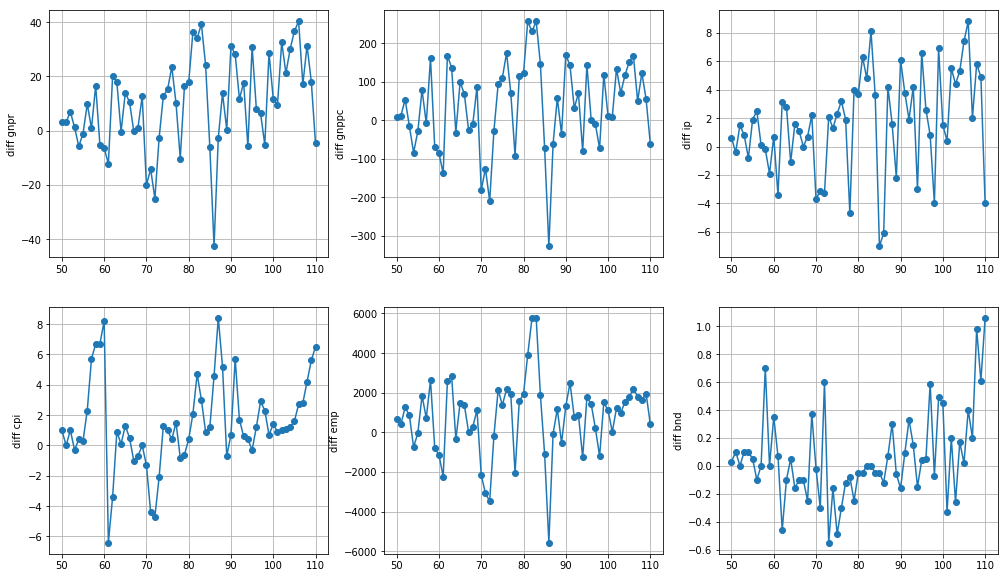

In [314]:
plt.figure(figsize=(17,10))

plt.subplot(2,3, 1)
plt.plot(df_x['gnpr'],marker = 'o')
plt.grid()
plt.ylabel('diff gnpr')

plt.subplot(2,3, 2)
plt.plot(df_x['gnppc'],marker = 'o')
plt.grid()
plt.ylabel('diff gnppc')

plt.subplot(2,3, 3)
plt.plot(df_x['ip'],marker = 'o')
plt.grid()
plt.ylabel('diff ip')

plt.subplot(2,3, 4)
plt.plot(df_x['cpi'],marker = 'o')
plt.grid()
plt.ylabel('diff cpi')

plt.subplot(2,3, 5)
plt.plot(df_x['emp'],marker = 'o')
plt.grid()
plt.ylabel('diff emp')

plt.subplot(2,3, 6)
plt.plot(df_x['bnd'],marker = 'o')
plt.grid()
plt.ylabel('diff bnd')

#plt.savefig("NP_plots")


In [315]:
X = df_np[['log_ip_diff','bnd_diff']]
y = df_np['log_sp_diff']

Xnew = sm.add_constant(X)
model_np_2 = sm.OLS(y, Xnew).fit()
y_fitted_2 = model_np_2.predict(Xnew)
model_np_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_sp_diff   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     12.95
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.24e-05
Time:                        07:12:59   Log-Likelihood:                 30.326
No. Observations:                  61   AIC:                            -54.65
Df Residuals:                      58   BIC:                            -48.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0166      0.021      0.789      0.433      -0.025       0.059
log_ip_diff     0.6975      0.168      4.143      0.000       0.361       1.034
bnd_diff       -0.1322      0.062     -2.124      0.038      -0.257      -0.008
==============================================================================
Omnibus:                        4.023   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.176
Skew:                          -0.534   Prob(JB):                        0.204
Kurtosis:                       3.327   Cond. No.                         8.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'QQ Plot')

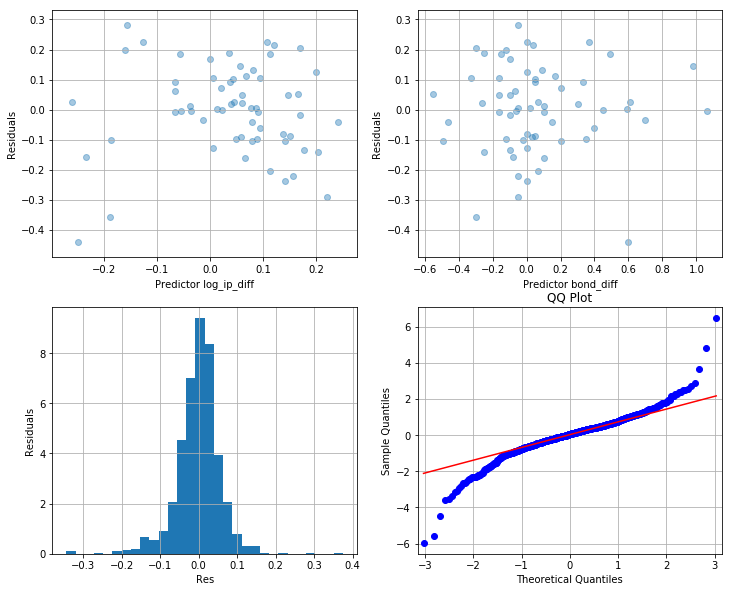

In [316]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax= axes.flatten()

#fig.suptitle("A few diagnostic plots", size = 15)
res_np_2 = model_np_2.resid

ax[0].scatter(df_np['log_ip_diff'], res_np_2, marker = 'o', alpha = 0.4)
ax[0].grid()
ax[0].set(xlabel = 'Predictor log_ip_diff', ylabel = 'Residuals')

ax[1].scatter(df_np['bnd_diff'], res_np_2, marker = 'o', alpha = 0.4)
ax[1].grid()  
ax[1].set(xlabel = 'Predictor bond_diff', ylabel = 'Residuals')


ax[2].hist(res, bins = 30, density = True)
ax[2].grid()
ax[2].set(xlabel = 'Res', ylabel = 'Residuals')


sm.qqplot(res, fit = True, line='q',ax = ax[3])
ax[3].grid()
ax[3].set_title("QQ Plot")

#plt.savefig("Diagnostics_graphs1")

In [ ]:
regression_fit